# RiceLeaf - Domain analysis

Riceleaf is the leaf of the Rice producing crop. Rice is stape food for large parts of this world, mostly grown and savoured in the asiatic regions. The size and shape of rice and it's leaves will vary depending on the rice variety, environmental conditions, and stage of growth. As the rice plant matures, the leaves may change in color and exhibit different characteristics, especially if affected by diseases, pests, or environmental stressors. The riceleaves heath is essential to determine the health of the crop, so a regular monitering is essential to detect any diseases, problems caused by the insects. In this project we are motivated to handle the data to detect three imports issues to tackle the health of the rice leaves (i) Leaf smut (ii) Brown spot (iii) Bacterial leaf blight Data contain a total of 119 Images, eqaully distributed among these three diseases.
Bacterial leaf blight, caused by the bacterium Xanthomonas oryzae pv. oryzae, is a serious disease that can cause extensive damage to rice plants. The symptoms of bacterial leaf blight include water-soaked lesions on the leaves, which later turn brown and dry up. In severe cases, the disease can cause wilting and death of the plant, leading to a significant reduction in crop yield (1).

Brown spot, caused by the fungus Cochliobolus miyabeanus, is another major rice disease that can cause significant yield losses. The disease is characterized by small, oval to elliptical spots on the leaves, which turn brown with a yellow halo. In severe cases, the spots can coalesce and cause the leaves to wither and die. Brown spot can also affect the panicles, leading to a reduction in grain quality and yield (2).

Leaf smut, caused by the fungus Entyloma oryzae, is a relatively less common rice disease. The symptoms of leaf smut include the formation of small, round, and reddish-brown spots on the leaves. These spots later turn black and produce powdery spores. Although leaf smut does not usually cause significant yield losses, it can affect the quality of rice grains by reducing their weight and size (3).

Effective disease management strategies are crucial for controlling these diseases and reducing their impact on rice production. Some of the common methods for disease management include crop rotation, use of resistant cultivars, application of fungicides, and cultural practices such as proper crop spacing and irrigation management (4).

In recent years, the use of machine learning algorithms for plant disease diagnosis and classification has gained significant attention. With the availability of large datasets of plant images and the advancements in deep learning algorithms, it has become possible to accurately classify plant diseases based on their visual symptoms. This has the potential to improve disease management strategies and reduce the impact of plant diseases on crop production (5).

# An approach to CNN implementation

1. import the libaraies and the dataset 2. Image visualization 3. Rescaling the pixel image by 255 4. Dividing dataset into training, validation and testing 5. Model architecture 6. Model compilation 7. Model training 8. Load the Model with the Best Validation Accuracy 9. visualize some predictions

# 1. Importing the Libaraies

In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import seaborn as sns 
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

C:\Users\SAMEER\Downloads\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.neural_network import MLPClassifier
import os
from os import listdir
from PIL import Image
import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
pip install --upgrade tensorflow-hub

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow_hub as hub
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 1.1 Libraries

**These libraries include the main CNN application and the hyperparameters(further libraries will be added later)**

# 1.2 Import the dataset

In [5]:
import os
import numpy as np
from PIL import Image

def load_images_from_folder(folder_path, target_size=(224, 224)):
    images = []
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            image_path = os.path.join(root, file_name)
            try:
                img = Image.open(image_path)
                img = img.resize(target_size)
                img_array = np.array(img)
                images.append((img_array, os.path.basename(root)))
            except Exception as e:
                print(f"Error loading image: {image_path}. Error: {e}")

    return images

# Use a raw string for the folder paths
images_dir1 = load_images_from_folder(r'C:\Users\SAMEER\document\Project\Data\Bacterial leaf blight')
images_dir2 = load_images_from_folder(r'C:\Users\SAMEER\document\Project\Data\Brown spot')
images_dir3 = load_images_from_folder(r'C:\Users\SAMEER\document\Project\Data\Leaf smut')

# Print out the number of images loaded
print(f"Number of images loaded from directory 1: {len(images_dir1)}")
print(f"Number of images loaded from directory 2: {len(images_dir2)}")
print(f"Number of images loaded from directory 3: {len(images_dir3)}")


Number of images loaded from directory 1: 40
Number of images loaded from directory 2: 40
Number of images loaded from directory 3: 39


A folder containing three different types of images classification and split them accordingly

# 1.3. Image visualisation

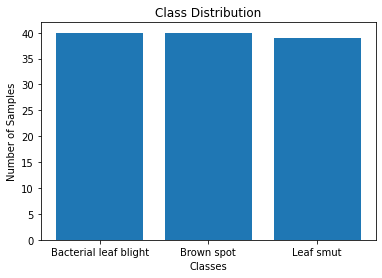

In [6]:
class_counts = {class_name: len(images) for class_name, images in {
    'Bacterial leaf blight': images_dir1,
    'Brown spot': images_dir2,
    'Leaf smut': images_dir3
}.items()}

plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()

-From this data visualization we can observe there are a total of 119 images. -40 in Bacterial Leaf Blight and Brown Spot Classes -39 images available in Leaf Smut

Text(0.5, 1.0, 'Distribution of Image Sizes')

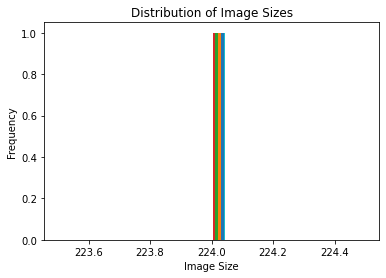

In [7]:
image_sizes = [img.shape[:1] for img, _ in images_dir1 + images_dir2 + images_dir3]

plt.hist(image_sizes, bins=20)
plt.xlabel('Image Size')
plt.ylabel('Frequency')
plt.title('Distribution of Image Sizes')

In [8]:
no_of_samples = 15

dir1_set = images_dir1[:no_of_samples]
dir2_set = images_dir2[:no_of_samples]
dir3_set = images_dir3[:no_of_samples]

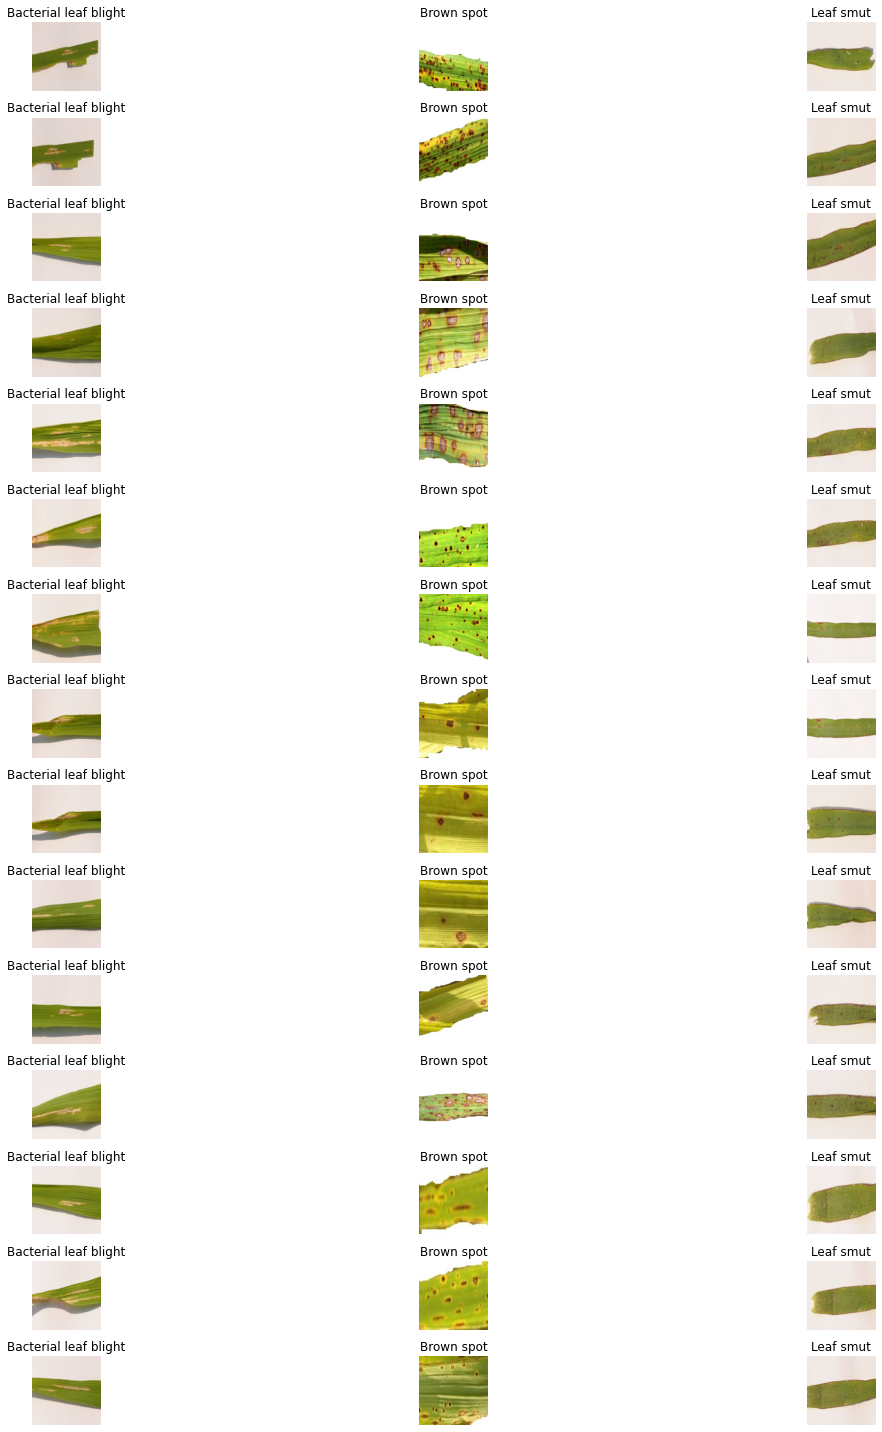

In [9]:
fig, axes = plt.subplots(nrows = no_of_samples, ncols = 3, figsize=(20,20))

for i in range(no_of_samples):
    axes[i,0].imshow(dir1_set[i][0])
    axes[i,0].set_title('Bacterial leaf blight')
    axes[i,0].axis('off')
    
    axes[i,1].imshow(dir2_set[i][0])
    axes[i,1].set_title('Brown spot')
    axes[i,1].axis('off')
    
    axes[i,2].imshow(dir3_set[i][0])
    axes[i,2].set_title('Leaf smut')
    axes[i,2].axis('off')
    
plt.tight_layout()
plt.show()

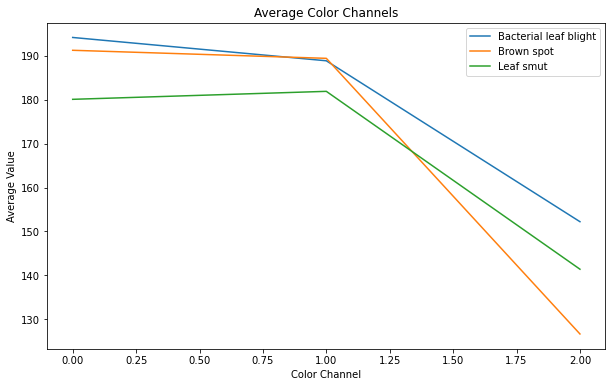

In [10]:
avg_colors = {}
for class_name, images in {
    'Bacterial leaf blight': images_dir1,
    'Brown spot': images_dir2,
    'Leaf smut': images_dir3
}.items():
    avg_color = np.mean([np.mean(img, axis=(0, 1)) for img, _ in images], axis=0)
    avg_colors[class_name] = avg_color

plt.figure(figsize=(10, 6))
for class_name, avg_color in avg_colors.items():
    plt.plot(avg_color, label=class_name)
plt.xlabel('Color Channel')
plt.ylabel('Average Value')
plt.title('Average Color Channels')
plt.legend()
plt.show()


The Average colour scheme represents that RGB distribution of each disease dataset

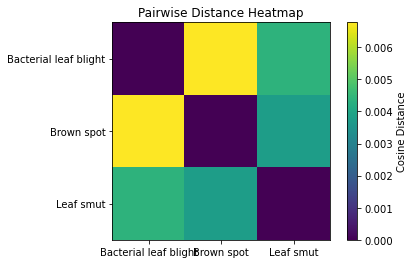

In [11]:
from sklearn.metrics.pairwise import pairwise_distances

class_avg_images = [np.mean([img for img, _ in images], axis=0) for images in [images_dir1, images_dir2, images_dir3]]

class_avg_images_reshaped = [avg_img.reshape(-1) for avg_img in class_avg_images]

distances = pairwise_distances(class_avg_images_reshaped, metric='cosine')

plt.imshow(distances, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Cosine Distance')
plt.xticks(range(3), ['Bacterial leaf blight', 'Brown spot', 'Leaf smut'])
plt.yticks(range(3), ['Bacterial leaf blight', 'Brown spot', 'Leaf smut'])
plt.title('Pairwise Distance Heatmap')
plt.show()

The heatmap visualizes how similar or dissimilar the average image patterns are between different classes. Darker areas indicate lower cosine distances and greater similarity, while lighter areas indicate higher distances and greater dissimilarity. This information can help you understand the relationships and separability of different classes based on their visual patterns.

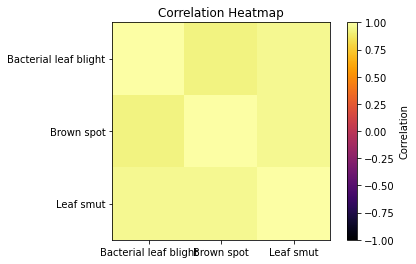

In [12]:
class_avg_images = [np.mean([img for img, _ in images], axis=0) for images in [images_dir1, images_dir2, images_dir3]]

class_avg_images_flattened = [avg_img.flatten() for avg_img in class_avg_images]

correlations = np.corrcoef(class_avg_images_flattened)

plt.imshow(correlations, cmap='inferno', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xticks(range(3), ['Bacterial leaf blight', 'Brown spot', 'Leaf smut'])
plt.yticks(range(3), ['Bacterial leaf blight', 'Brown spot', 'Leaf smut'])
plt.title('Correlation Heatmap')
plt.show()


# 2. Data Preprocessing

In [13]:
from tensorflow.keras.preprocessing.image import img_to_array

In [14]:
x_image = []
y_label = []

for img, label in images_dir1: 
    x_image.append(img)
    y_label.append(label)
    
for img, label in images_dir2:  
    x_image.append(img)
    y_label.append(label)
    
for img, label in images_dir3:
    x_image.append(img)
    y_label.append(label)

x and y store image data and class labels. x is the images and the y is the disease it belongs to

           converting images to Numpy arrays

# Normalisation

Normalization of image data is an important step in the pre-processing of data before it is used to train a neural network. It involves transforming the pixel values of the input images so that they fall within a specific range, typically [0, 1]. Normalization ensures that the input features have similar scales, which can prevent some input features from dominating others during the training process.

By scaling the pixel values, normalization also makes it easier for the neural network to learn the underlying patterns in the data. This is because the weights in the neural network can be updated more easily and quickly when the input data has a similar scale. In addition, normalization can help to reduce the effects of lighting conditions, noise and other factors that can cause variation in the input data.

Overall, normalization is an important step that can improve the performance and accuracy of a neural network by ensuring that the input data is in a consistent and standardized format.

we normalize the dataset of our dataset images. Images are essentially numerical data with pixel values representing color intensity. # Converting images into Numpy arrays ensures that they can be treated as numerical data by the model.

# 3. rescaling and splitting the data

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [16]:
x_image =np.array(x_image)
y_label = np.array(y_label)

y_encoded = label_encoder.fit_transform(y_label)

In [17]:
x_image.shape

(119, 224, 224, 3)

In [18]:
x_image = x_image / 255.0

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_image, y_encoded, test_size=0.2, random_state=42)

In [20]:
print(x_train.shape)
print(y_train.shape)

(95, 224, 224, 3)
(95,)


# 4. Model Architecture

In [21]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')  
])

# 5. Compile the Model

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 6. Model training and testing

In [23]:
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# testing the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

Epoch 1/30

3/3 [==============================] - 6s 1s/step - loss: 1.5526 - accuracy: 0.4342 - val_loss: 1.0413 - val_accuracy: 0.5263
Epoch 2/30
3/3 [==============================] - 2s 631ms/step - loss: 1.0565 - accuracy: 0.5263 - val_loss: 1.3482 - val_accuracy: 0.1579
Epoch 3/30
3/3 [==============================] - 2s 506ms/step - loss: 0.9915 - accuracy: 0.5000 - val_loss: 1.2284 - val_accuracy: 0.2632
Epoch 4/30
3/3 [==============================] - 2s 536ms/step - loss: 0.8930 - accuracy: 0.5789 - val_loss: 1.1229 - val_accuracy: 0.3158
Epoch 5/30
3/3 [==============================] - 2s 543ms/step - loss: 0.9486 - accuracy: 0.5789 - val_loss: 1.0258 - val_accuracy: 0.3684
Epoch 6/30
3/3 [==============================] - 2s 542ms/step - loss: 0.8626 - accuracy: 0.5789 - val_loss: 0.9941 - val_accuracy: 0.6316
Epoch 7/30
3/3 [==============================] - 2s 557ms/step - loss: 0.7864 - accuracy: 0.7105 - val_loss: 1.1505 - val_accuracy: 0.2632
Epoch 8/30
3/3 [======

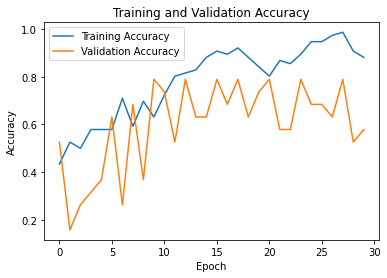

1/1 [==============================] - 1s 557ms/step


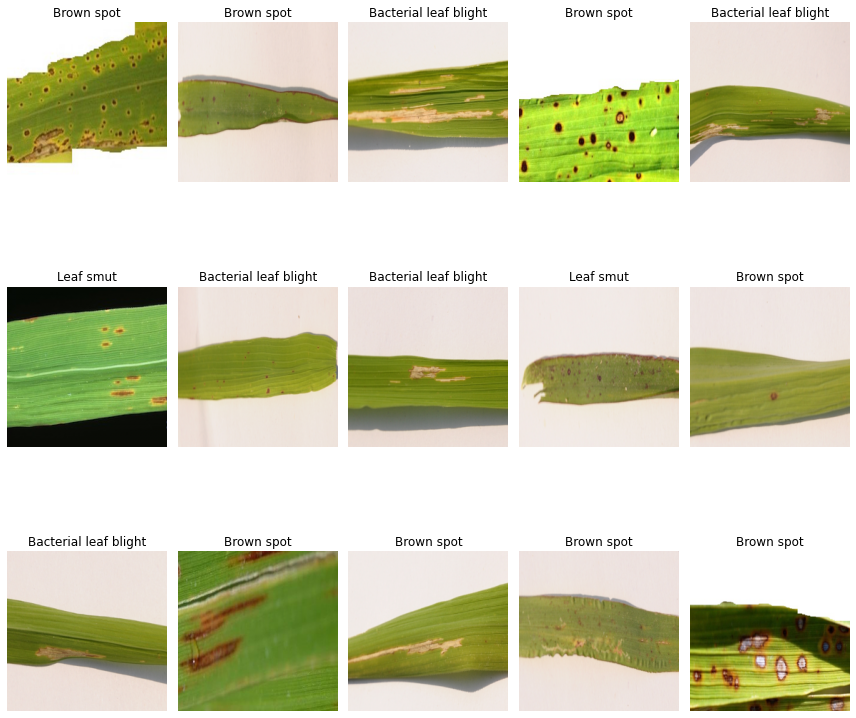

In [24]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

predicted_class_labels = label_encoder.inverse_transform(predicted_labels)

plt.figure(figsize=(12, 12))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(predicted_class_labels[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

for hyperparameter tuning we will possibly use, learning rate and daa augmentation

Hyperparmeter tuning

Learning rate

In [25]:
learning_rate = 0.0001

In [26]:
model_hp = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax') 
])

In [27]:
optimizer = Adam(learning_rate=learning_rate)

In [28]:
model_hp.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
# model training
# epoch(n) - the training process will iterate through the entire training dataset n number of times, 
            #updating the model's parameters in each iteration.
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# testing the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

#epoch 30 and dense 256 gave me an acuracy of 0.3
#but dense 128 performs the same 
#if i dont have     Conv2D(256, (3, 3), activation='relu'),
    #MaxPooling2D((2, 2)), the results are the same 
# epoch 10 gave accuracy of 0.3-0.5
# epoch 30 gives a test accuracy of 0.5-0.8

Epoch 1/30
3/3 [==============================] - 2s 634ms/step - loss: 0.1153 - accuracy: 0.9474 - val_loss: 0.7152 - val_accuracy: 0.8421
Epoch 2/30
3/3 [==============================] - 2s 581ms/step - loss: 0.1007 - accuracy: 0.9605 - val_loss: 0.6523 - val_accuracy: 0.7368
Epoch 3/30
3/3 [==============================] - 2s 589ms/step - loss: 0.0699 - accuracy: 1.0000 - val_loss: 0.8157 - val_accuracy: 0.6316
Epoch 4/30
3/3 [==============================] - 2s 588ms/step - loss: 0.0614 - accuracy: 1.0000 - val_loss: 1.0407 - val_accuracy: 0.6316
Epoch 5/30
3/3 [==============================] - 2s 573ms/step - loss: 0.0453 - accuracy: 1.0000 - val_loss: 1.2272 - val_accuracy: 0.6316
Epoch 6/30
3/3 [==============================] - 2s 589ms/step - loss: 0.0256 - accuracy: 1.0000 - val_loss: 1.3899 - val_accuracy: 0.6316
Epoch 7/30
3/3 [==============================] - 2s 590ms/step - loss: 0.0350 - accuracy: 0.9868 - val_loss: 1.3720 - val_accuracy: 0.6842
Epoch 8/30
3/3 [====

Hyperparameter testing 2 Data Augmentation

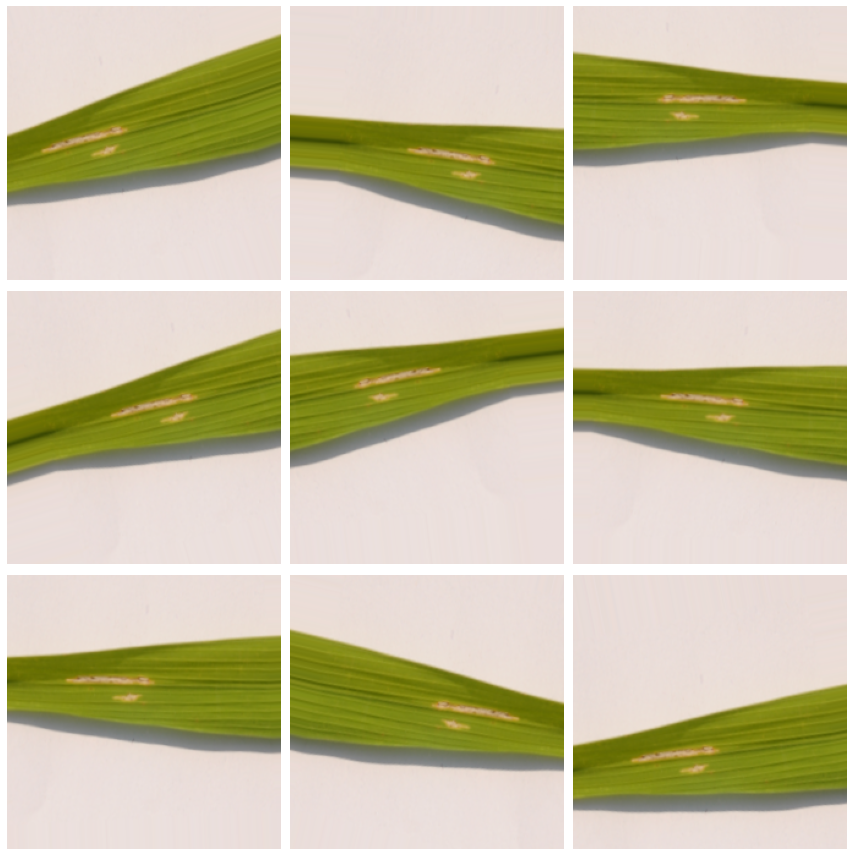

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

sample_image = x_image[2]
sample_image = np.expand_dims(sample_image, axis=0)

plt.figure(figsize=(12, 12))
for i, augmented_image in enumerate(data_generator.flow(sample_image, batch_size=1)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis('off')
    if i == 8:
        break
plt.tight_layout()
plt.show()

In [31]:
def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Data Augmentation

Data augmentation is a technique used to increase the size and diversity of a dataset by applying various transformations to the existing data. This technique has become an essential tool in computer vision and image processing tasks, such as object recognition and classification, due to its ability to enhance the generalization ability of machine learning models and prevent overfitting.

In the context of our rice leaf disease image classification project, data augmentation can play a crucial role in improving the performance and robustness of our model. By generating new images with different variations such as rotations, flips, zooms, and other transformations, we can increase the diversity of our dataset and provide our model with more examples to learn from, which can lead to better classification accuracy and robustness to variations in the real-world data.

Therefore, data augmentation is an important aspect to consider in our project, and we will explore various techniques and approaches to implement it effectively.

In [32]:
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [33]:
input_shape = (224, 224, 3)
num_classes = len(label_encoder.classes_)
model_da = create_model(input_shape, num_classes)

In [34]:
augmented_data = datagen.flow(x_train, y_train, batch_size=32)

In [ ]:
history = model_da.fit(augmented_data, epochs=30, steps_per_epoch=len(x_train) // 32, validation_data=(x_test, y_test))

Epoch 1/30
2/2 [==============================] - 4s 1s/step - loss: 2.0792 - accuracy: 0.3810 - val_loss: 3.0527 - val_accuracy: 0.3750
Epoch 2/30
2/2 [==============================] - 2s 1s/step - loss: 2.5940 - accuracy: 0.3810 - val_loss: 1.2485 - val_accuracy: 0.3333
Epoch 3/30
2/2 [==============================] - 2s 1s/step - loss: 1.1088 - accuracy: 0.4603 - val_loss: 1.1068 - val_accuracy: 0.3333
Epoch 4/30
2/2 [==============================] - 2s 1s/step - loss: 1.1463 - accuracy: 0.3281 - val_loss: 1.0862 - val_accuracy: 0.4167
Epoch 5/30
2/2 [==============================] - 2s 1s/step - loss: 1.0888 - accuracy: 0.3968 - val_loss: 1.0811 - val_accuracy: 0.3750
Epoch 6/30
2/2 [==============================] - 2s 1s/step - loss: 1.0712 - accuracy: 0.4127 - val_loss: 1.0910 - val_accuracy: 0.2917
Epoch 7/30
2/2 [==============================] - 2s 1s/step - loss: 1.0725 - accuracy: 0.3750 - val_loss: 1.0764 - val_accuracy: 0.4167
Epoch 8/30
2/2 [=========================

In [ ]:
test_loss, test_accuracy = model_da.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# MLP

In [ ]:
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

model_mlp = MLPClassifier(hidden_layer_sizes=(20, 2),
                          learning_rate_init=0.001,
                          max_iter=75,
                          random_state=12)

model_mlp.fit(x_train_flattened, y_train)

In [ ]:
from sklearn.metrics import classification_report

y_pred = model_mlp.predict(x_test_flattened)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(class_report)


# Keras Tuner

Keras Tuner is a hyperparameter tuning library for Keras, which allows users to search for the best hyperparameters in an automated way. Hyperparameter tuning is a crucial step in building machine learning models, and it involves finding the best set of hyperparameters for a given model architecture and dataset. The optimal hyperparameters can help to achieve better performance in terms of accuracy, speed, and generalization ability of the model.

In this project, Keras Tuner has been used to search for the optimal hyperparameters of the convolutional neural network model, which includes the number of convolutional layers, the number of filters in each layer, the kernel size, the activation function, and the learning rate of the optimizer. The goal is to find the best combination of hyperparameters that can improve the accuracy of the model on the test dataset.

At the end, we will analyse whether the model performance improves or not

In [ ]:
pip install keras-tuner

In [ ]:
from kerastuner.tuners import RandomSearch

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(224, 224, 3)))  # Adjust input shape as needed
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=16, max_value=128, step=16),
                               activation='relu'))
    model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=20,
    directory='keras_tuner_dir',
    project_name='rice_leaf_classification'
)

tuner.search(x_train, y_train, validation_split=0.2, epochs=10)

best_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

In [ ]:
y_pred = best_model.predict(x_test)
predicted_labels = np.argmax(y_pred, axis=1)
predicted_class_labels = label_encoder.inverse_transform(predicted_labels)

print(classification_report(y_test, predicted_labels, target_names=label_encoder.classes_))

# Model Comparision

In conclusion CNN with Data augmentation provides the best possible result

# Challenges Faced